### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
# import python packages to be used
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(color_codes=True) # to beautify the background of plots
%matplotlib inline 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
# import the datasets as dataframes
Data = pd.read_csv('Data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
# Get information about the Data dataframe
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
# Get the shape of the Data dataframe i.e the numbers of rows and columns
Data.shape

(100000, 4)

In [6]:
# Get the descriptive statistics of the Data dataframe and transpose the display
Data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [7]:
# Find the total number of missing values in each of the columns of the Data dataframe
Data.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [8]:
# Get information about the item dataframe
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [9]:
# Get the shape of the item dataframe i.e the numbers of rows and columns
item.shape

(1681, 22)

In [10]:
# Get the descriptive statistics of the item dataframe and transpose the display
item.describe(include='all')

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681,1681,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,...,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
unique,NaN,1658,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,That Darn Cat!,01-Jan-1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,841.841761,NaN,NaN,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,...,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,NaN,NaN,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,...,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
# Find the total number of missing values in each of the columns of the item dataframe
item.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [11]:
# Get information about the user dataframe
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [13]:
# Get the shape of the user dataframe i.e the numbers of rows and columns
user.shape

(943, 5)

In [14]:
# Get the descriptive statistics of the user dataframe and transpose the display
user.describe(include="all")

,user id,age,gender,occupation,zip code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [15]:
# Find the total number of missing values in each of the columns of the user dataframe
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [16]:
#total number of movies per genre
movie_genres = item.iloc[:,3:].sum()# use sum on the default axis
movie_genres

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [17]:
#Display the dataframe
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [18]:
item.iloc[:,3:].sum(axis=1)#hint: use sum on the axis = 1

0       3
1       3
2       1
3       3
4       3
       ..
1676    1
1677    2
1678    2
1679    1
1680    1
Length: 1681, dtype: int64

In [13]:
item[item.iloc[:,3:].sum(axis=1)>1].shape[0]

849

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [12]:
item.drop(columns="unknown")

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

In [14]:
# create a 'release year' column using the split method.
item["release year"] = item["release date"].str.split("-").str[-1]
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


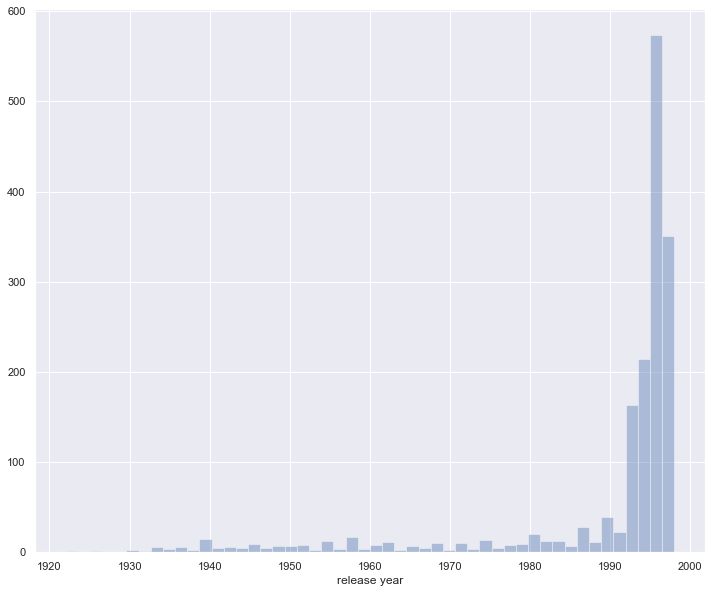

In [15]:
# Univariate plot for 'release year'
plt.figure(figsize=(12,10))
sns.distplot(item['release year'], kde=False);

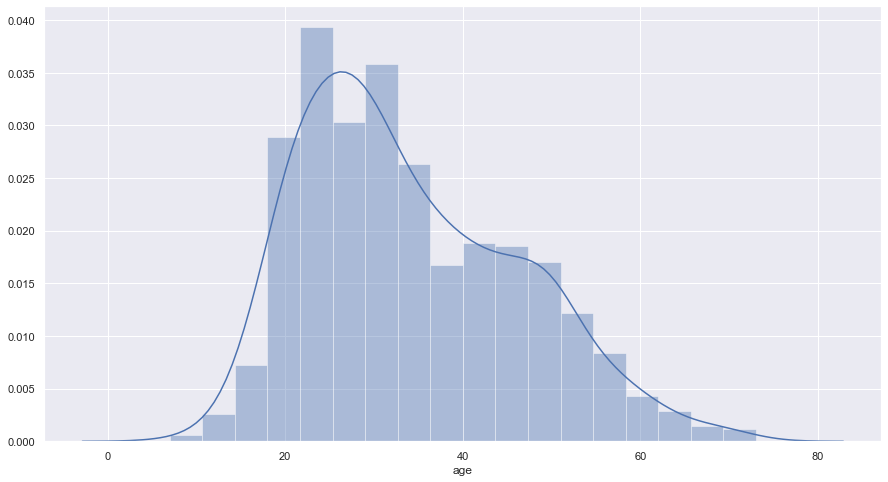

In [16]:
# Univariate plot for 'Age'
plt.figure(figsize=(15,8))
sns.distplot(user["age"])

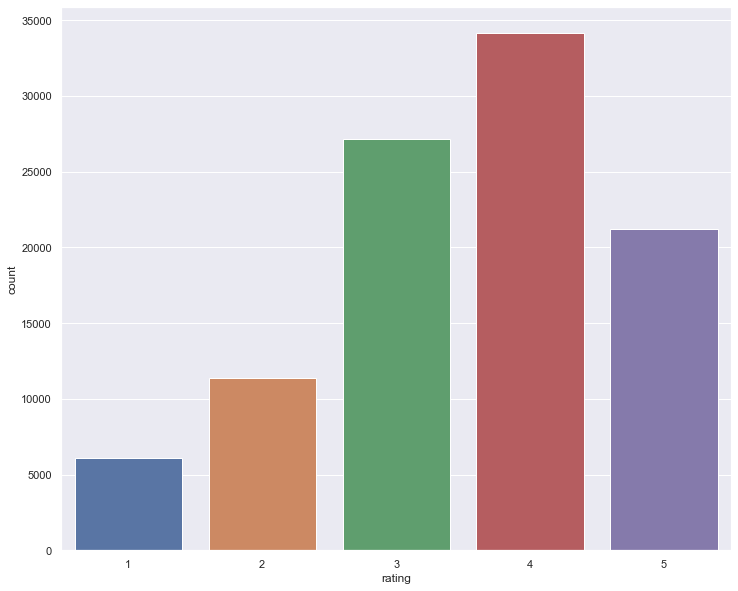

In [17]:
# Univariate plot for 'Rating'
plt.figure(figsize=(12,10))
sns.countplot(Data["rating"])

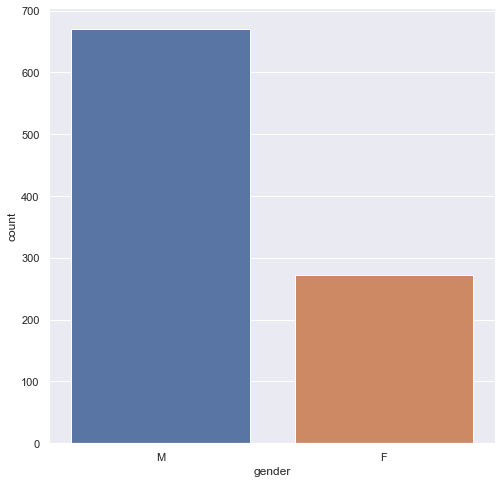

In [18]:
# Univariate plot for 'Gender'
plt.figure(figsize=(8,8))
sns.countplot(user["gender"])

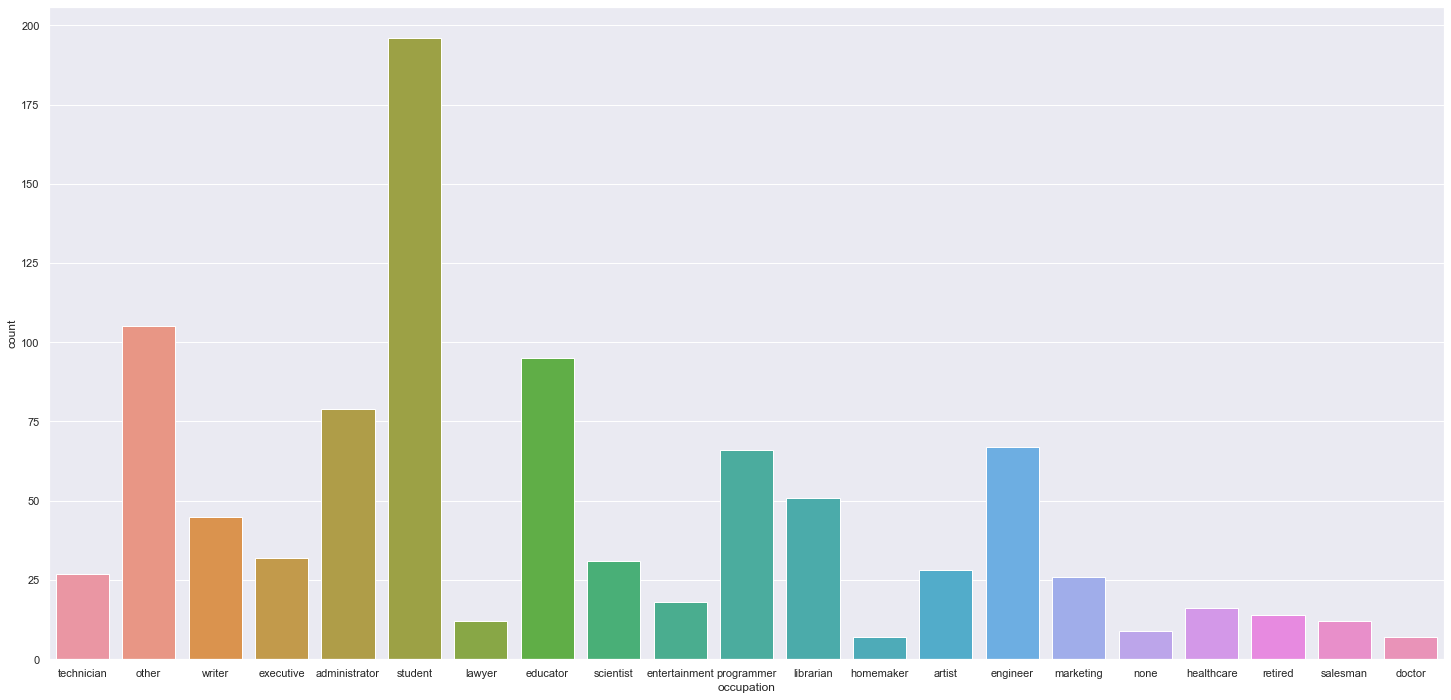

In [19]:
# Univariate plot for 'Occupation'
plt.figure(figsize=(25,12))
sns.countplot(user["occupation"])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [20]:
genre_per_year = item.groupby(by="release year").sum()#Your answer here
genre_per_year.tail()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,,
1994,189000,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,183514,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,322295,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2
1997,253649,0,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0
1998,75341,0,12,3,0,1,13,7,3,33,1,2,4,1,3,11,5,18,0,0


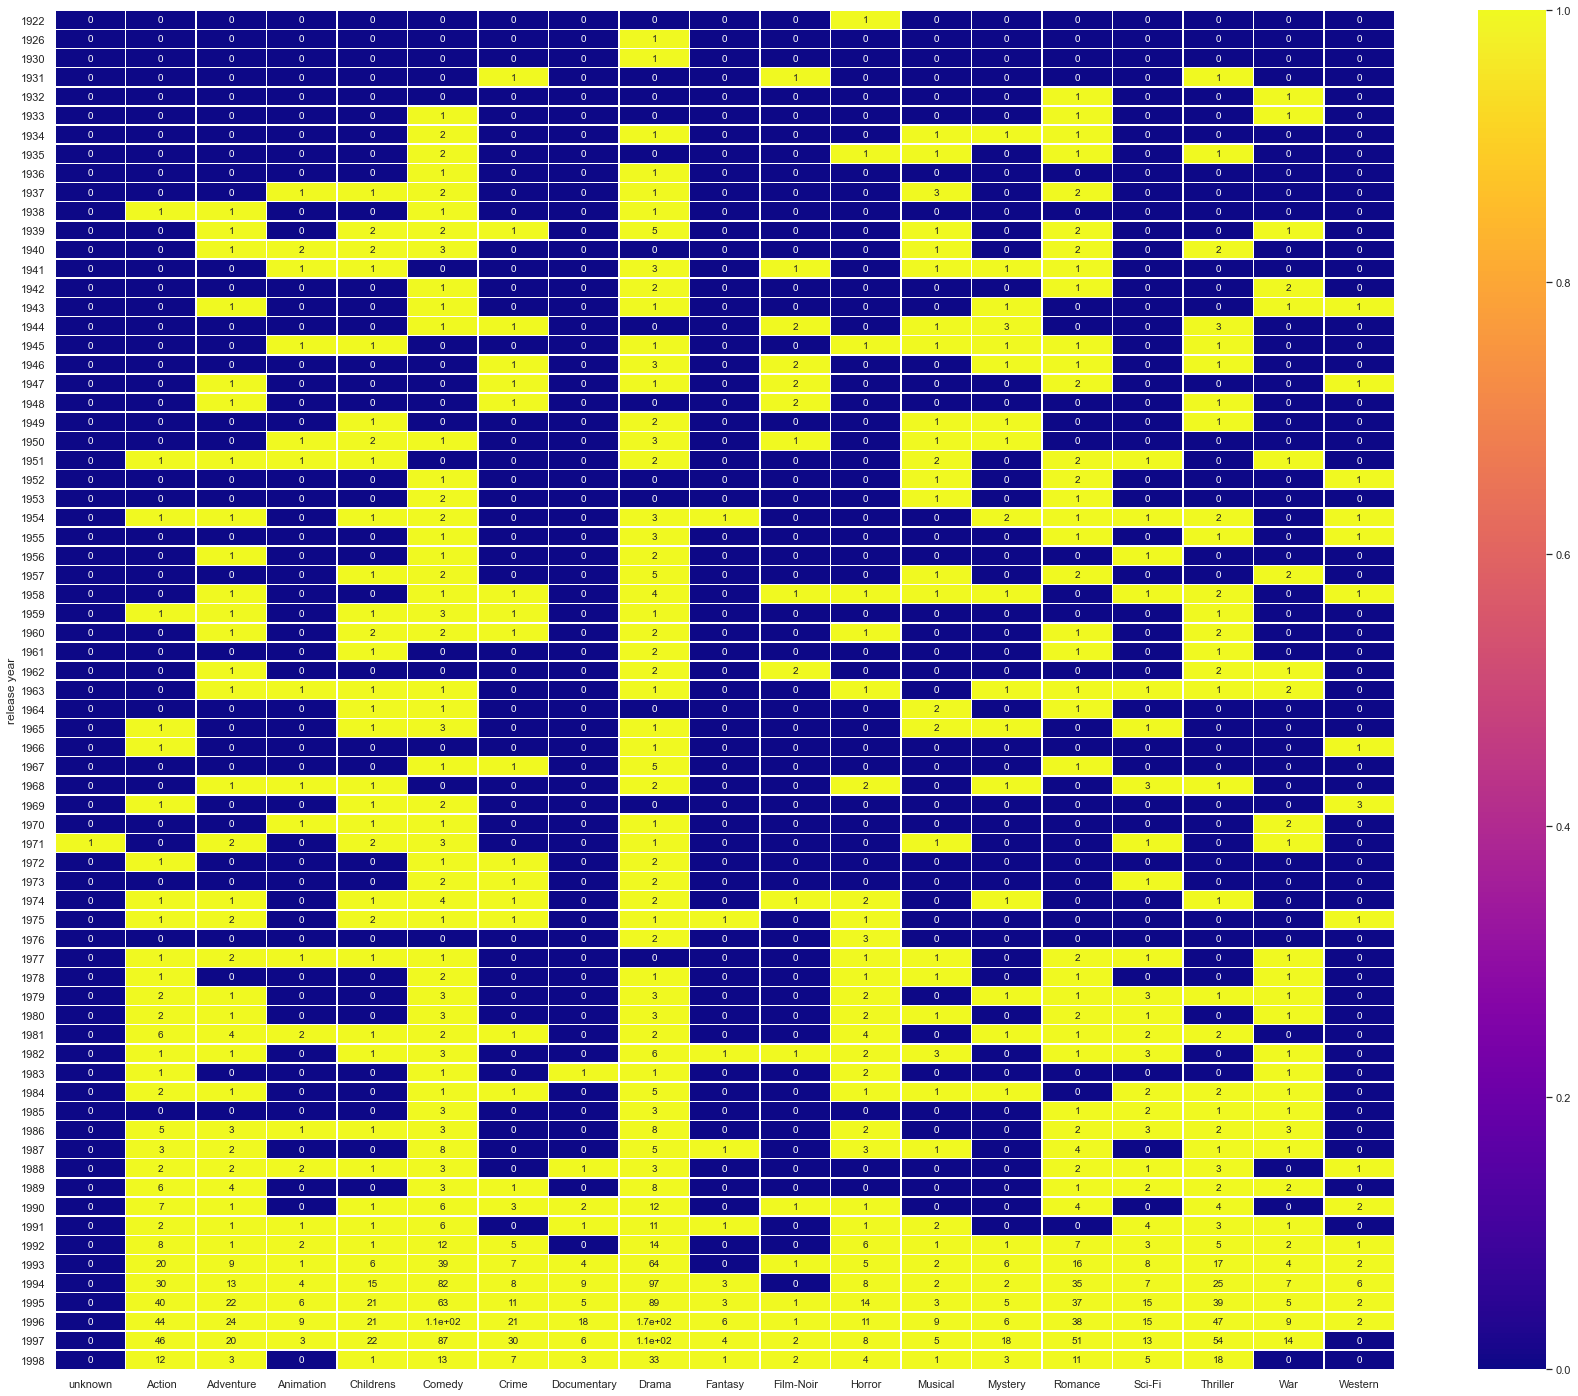

In [21]:
#drop 'movie id' from the dataframe and create heatmap to show the popularity of genre per year 
genre_per_year2 = genre_per_year.drop(['movie id'], axis=1)
fig, ax = plt.subplots(figsize=(30,25))     
sns.heatmap(genre_per_year2, annot=True,cmap='plasma',linewidths= .5, vmin=0,vmax=1, ax=ax)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [22]:
all_movies = Data.groupby("movie id")[["user id"]].count()#your answer here
plus_100 = all_movies[all_movies['user id']>100]
average_rating = Data.groupby("movie id")[["rating"]].mean()
movie_titles = item[['movie id','movie title']] 
top_movies_rating = pd.merge(movie_titles,plus_100, how = 'inner', on = 'movie id').merge(average_rating, how = 'inner', on = 'movie id')
# Provide Top 25 movies according to average ratings
top_movies_rating.sort_values(by ='rating', ascending = False).head(25)



,movie id,movie title,user id,rating
231,408,"Close Shave, A",112,4.491071
202,318,Schindler's List,298,4.466443
91,169,"Wrong Trousers, The",118,4.466102
261,483,Casablanca,243,4.456790
29,64,"Shawshank Redemption, The",283,4.445230
292,603,Rear Window,209,4.387560
7,12,"Usual Suspects, The",267,4.385768
22,50,Star Wars,583,4.358491
99,178,12 Angry Men,125,4.344000
72,134,Citizen Kane,198,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [23]:
#merge the relevant dataset
movies_merged = pd.merge(user, pd.merge(Data,item, on = 'movie id',how ='outer'), on = 'user id', how = "inner")
movies_merged.head()

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,24,M,technician,85711,242,5,889751633,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
1,1,24,M,technician,85711,51,4,878543275,Legends of the Fall,01-Jan-1994,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1994
2,1,24,M,technician,85711,265,4,878542441,"Hunt for Red October, The",01-Jan-1990,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1990
3,1,24,M,technician,85711,86,5,878543541,"Remains of the Day, The",01-Jan-1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993
4,1,24,M,technician,85711,257,4,874965954,Men in Black,04-Jul-1997,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1997


In [24]:
#Gender Distribution across genres
movies_gender_group = movies_merged.groupby("gender").sum().T
movies_gender_group.drop(index =["user id",  "age", "movie id", "rating", "timestamp"], inplace = True)
gender_percent = movies_gender_group.apply(lambda x : x/x.sum()*100).T
gender_percent [['Drama','Sci-Fi','Romance']]


,Drama,Sci-Fi,Romance
gender,,,
F,20.498687,4.895626,10.908549
M,18.181074,6.357428,8.561538


#### Conclusion:



In [ ]:
# Statements validation
Statement 1 : False
Statement 2 : False 
Statement 3:  False